# Comparing classifiers on toy datasets

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
import numpy as np

Generate three different datasets, with two classes

In [146]:
n_samples = 2000
random_state=42
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05, random_state=random_state)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05, random_state=random_state)
blobs = datasets.make_blobs(n_samples=n_samples, centers=2, random_state=random_state)

Plot class 1 in blue, and class 2 in green

In [140]:
colors = np.array(["blue", "green"])
def plot_data(dataset):
    X, y = dataset
    plt.scatter(X[:, 0], X[:, 1], color=colors[y].tolist())    

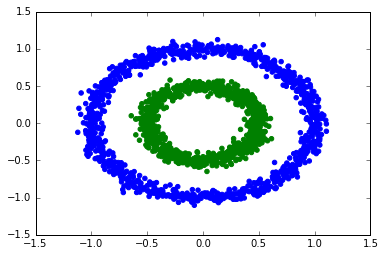

In [141]:
plot_data(noisy_circles)

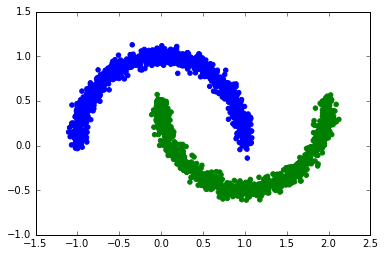

In [142]:
plot_data(noisy_moons)

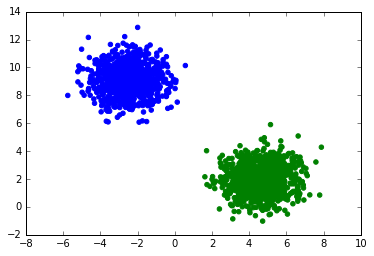

In [143]:
plot_data(blobs)

Partition a dataset into train/eval

In [209]:
def partition(dataset):
    data, eval_data = np.split(dataset[0],2)
    labels, eval_labels = np.split(dataset[1],2)
    return data, labels, eval_data, eval_labels

Import TensorFlow. We'll use tf.contrib.learn - a high level API

In [204]:
import tensorflow as tf
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

A linear classifier has no trouble with the blobs

In [210]:
data, labels, eval_data, eval_labels = partition(blobs)
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=2)
classifier.fit(data, labels, batch_size=50, steps=1000)
print "Accuracy", classifier.evaluate(eval_data, eval_labels)["accuracy"]

Accuracy 1.0


Let's plot its predictions

In [211]:
def plot_predictions(X, y, predictions):
    plt.scatter(X[:, 0], X[:, 1], color=colors[predictions].tolist())    

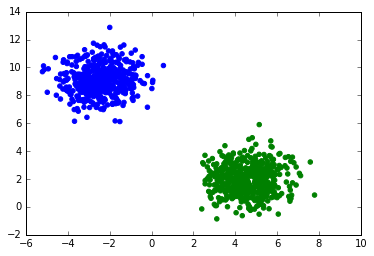

In [212]:
predictions = classifier.predict(eval_data)
plot_predictions(eval_data, eval_labels, predictions)

We can also plot the decision boundary on top of the original dataset

[]

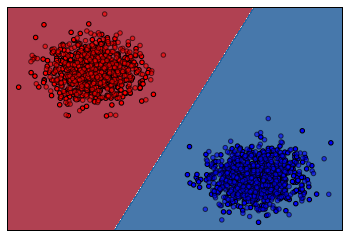

In [224]:
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the training points
ax = plt.subplot()
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cm = plt.cm.RdBu
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
# Plot also the training points
ax.scatter(data[:, 0], data[:, 1], c=labels, cmap=cm_bright)
# and testing points
ax.scatter(eval_data[:, 0], eval_data[:, 1], c=eval_labels, cmap=cm_bright,
           alpha=0.6)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

But it struggles with moon and circles

In [196]:
data, labels, eval_data, eval_labels = partition(noisy_circles)
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=2)
classifier.fit(data, labels, batch_size=50, steps=1000)
print "Accuracy", classifier.evaluate(eval_data, eval_labels)["accuracy"]

Accuracy 0.455


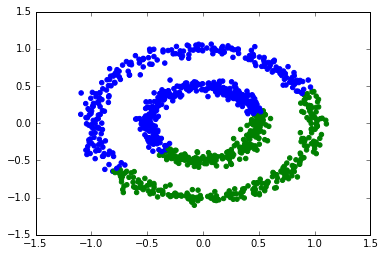

In [198]:
predictions = classifier.predict(eval_data)
plot_predictions(eval_data, eval_labels, predictions)

Fortunately, this is no problem for a deep neural network

In [199]:
data, labels, eval_data, eval_labels = partition(noisy_circles)
feature_columns = learn.infer_real_valued_columns_from_input(data)
# Build 3 layer DNN with 10, 20, 10 units respectively.
classifier = learn.DNNClassifier(feature_columns=feature_columns, hidden_units=[10, 20, 10], n_classes=2)
classifier.fit(data, labels, batch_size=50, steps=1000)
print "Accuracy", classifier.evaluate(eval_data, eval_labels)["accuracy"]

Accuracy 1.0


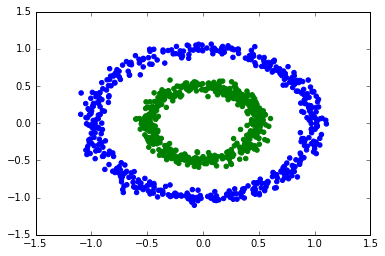

In [200]:
predictions = classifier.predict(eval_data)
plot_predictions(eval_data, eval_labels, predictions)